In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from wordcloud import WordCloud
from textblob import TextBlob
from collections import Counter

# Introduction

The emergence of fake news is a real issue that we face today. It’s become so much easier to spread knowledge and news around the world since all it takes is a click of a button instead of printing and delivering newspapers like in the olden days. We don’t know what to believe anymore when you read a random article on the internet. We're not talking about articles published by CNN, FOX, MSNBC, etc… But, the ones published by non-reputable sources. The news stories within them may or may not be true and there’s really no way to fully tell.

The phenomenon of fake news, defined as false or misleading information presented as news, has gained significant attention in recent years. Made up headlines and deformed images/videos are strictly designed to manipulate public opinion. This spread of fake news poses profound challenges to  societies worldwide. The consequences of misinformation can be severe, such as destroying public trust, amplifying social divisions, and undermining democratic institutions.

Conversely, real news, characterized by accurate, verified information based on facts and evidence, serves as the cornerstone of informed decision-making in society. Reliable journalism plays a crucial role in society, since it facilitates public discourse, and fosters an environment of trust and transparency. However, the credibility of legitimate news sources often faces scrutiny in an environment saturated with misinformation, leading to skepticism among people.

Our research paper seeks to **create a model that can correctly identify a piece of news as real or fake**. We aim to unravel the complexities surrounding the relationship between fake news and real news, and uncover valuable lessons that could help the public identify real/fake news in the future. 

Furthermore, we will also be creating **separate models for the News Headings (Title) and the actual body of text within the news**. We want to see if it is possible to correctly identify fake/real news just from the Title, instead of the whole article. If we can find a few key characteristics between the fake news headings, this could help the public immediately identify fake news without having to read further than the heading at the top.

## Findings and Implications


1. **Accuracy Improvement with Increased Word Count**:
   - The model's accuracy improves as the number of words used for vectorization increases. For example, accuracy increases from 76.41% with the top 100 words to 81.17% with the top 300 words in the title analysis. This trend suggests that a richer vocabulary provides a more robust basis for classification by capturing more nuanced differences between fake and real news.
2. **Confusion Matrix Insights**:
   - The confusion matrices reveal that while the number of false negatives generally decreases with an increase in vocabulary size, false positives show varied behavior. This observation is crucial for understanding the trade-offs between missing fake news and mistakenly labeling real news as fake.
3. **Differential Performance on Title vs. Text**:
   - Models trained on the full text of articles consistently outperform those trained only on titles. This result underscores the importance of context and the depth of content in accurately classifying news articles.
4. **Common Keywords**:
   - Word clouds generated from fake and real news headlines reveal distinct patterns in language use. Words like "Video," "Obama," "Trump," and "Hillary" are more prevalent in fake news, suggesting that sensational or politically charged content is a common feature of misinformation. Also, a longer title with shorter text length is more likely to be fake news rather than real news.

Educating the public about the characteristics of fake vs. real news, such as common keywords and title length, can enhance media literacy. This knowledge empowers readers to perform a quick initial assessment of news credibility.
Moreover, understanding the impact of misinformation on public opinion and democracy can guide the development of policies aimed at regulating the spread of fake news. Such policies could mandate transparency in news source accreditation and promote the development of open-source tools for news verification.

## Project Goals

We will be using supervised learning on a classification machine learning algorithm for this data science project. We have y_labels in our dataset (that we will remove for the test data), but this indicates that we will be performing supervised learning. We will be trying to classify whether a piece of text is fake, which is classified as a 0, or real, which is classified as 1.

Domain:

*   The domain is the detection of fake versus real news using machine learning and language models. The goal is to analyze textual content from various sources to identify markers of credibility or deception.

T, P, E:

*   T (task) is classification of news articles using machine learning models.  
*   P (performance) is Accuracy % (how many the model predicted right vs. how many the model looked at).
*   E (experience) is a database of news articles, tweets, headlines, and snippets with pre-specified classifications.


## Value Proposition

With fake news being so prevalent today, the ability to identify what is fake vs. real is extremely valuable. There’s 4 main value propositions:


*   Reducing exposure to misinformation: Combating the spread of fake news can contribute to maintaining the holistic integrity of news companies. This can also help limit the spread of false information, which we already see happening today. (The most recent example being the Baltimore Bridge tragedy).

*   Improving Media Literacy: This term refers to how aware a user is with false information. Is a user correctly able to tell whether a news article is real or not? Our model can help users find certain characteristics and patterns correlated with fake news. This allows users to quickly judge articles off a glance/skim and critically evaluate the credibility of different news sources.

*   Protecting News Outlets Reputation: Having a reliable model that can detect fake news can help protect many of the credible news outlets’ reputation. If the public can’t trust the news they read online, they won’t trust credible news sources or they will just find a different medium to get their news from. This means less users and less revenue for NY Times, CNN, WSJ, Forbes, etc.

*   Maintaining Public Trust: It seems as though most fake news comes around right at the time of elections. Why is this? Because politicians want to gain the trust of people so that they will vote for them. The public’s trust and opinion is very important as that determines who is POTUS, governors, and even social norms in society. In essence, trust is the glue that holds consumers and news outlets together. Detecting fake news can help news platforms gain public trust by demonstrating that they are committed to delivering accurate and real information.


# Methods

## Data

The dataset we are using is a fake news classification dataset that merged four popular news datasets to prevent over-fitting. There are 78098 data entries in the file, out of which only 72134 entries are accessed as per the data frame.

The dataset contains four columns: 
1. Serialized number(from 0 to 78098)
2. Title (news heading)
3. Text (news content)
4. Label ( 0 = fake and 1 = real)

Here's the link to the dataset: https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification/data

In the next section, we will go through a series of steps to first clean the data. There are many missing titles/texts, which we will first have to remove before continuing with the model. 

## Cleaning the Data

First let's look at a few summary statistics of the full dataset. 

Note:We only have 3 (non-index) columns in our dataset, and we plan to keep all 3 columns. So we don't have to remove any columns, but we might have to remove some rows here and there.

In [3]:
df = pd.read_csv('WELFake_Dataset.csv')
print(df.shape)
print(df.nunique(axis=0))
print(df.nunique()/len(df)*100)


(72134, 4)
Unnamed: 0    72134
title         62347
text          62718
label             2
dtype: int64
Unnamed: 0    100.000000
title          86.432196
text           86.946516
label           0.002773
dtype: float64


So, currently we have about 62k unique news articles, which is about 86% of the dataset. Let's check if there are any duplicate news articles in our dataset.

In [7]:
dups = df.duplicated()
print(dups.any())
df[dups]

False


,Unnamed: 0,title,text,label


It looks like there are no duplicates within our dataset. But then how come only 86% of the dataset had unique values. It could be due to the fact that different news articles could have the same title For example, we could have the following title correspond to various different news articles in our dataset: 'LAW ENFORCEMENT ON HIGH ALERT:'. This is probably why there are only 62k unique values out of 72k, but no duplicates. 

Since there are no duplicates, we do not need to remove any rows for now. 

In [8]:
del df[df.columns[0]]
features = df.columns[0:3]

num_missing = (df[features] == '').sum()
print(num_missing)

num_missing = (df[features] == ' ').sum()
print(num_missing)

num_missing = (df[features] == '  ').sum()
print(num_missing)

title    0
text     0
label    0
dtype: int64
title      0
text     738
label      0
dtype: int64
title    0
text     5
label    0
dtype: int64


We can see that we have 742 missing values within the text column. This means 742 instances of our dataset have a title but no article associated with it. We should remove these rows before continuing. 

In [9]:
df[features] = df[features].replace(' ', np.nan)
df[features] = df[features].replace('  ', np.nan)
print(df.isnull().sum())
df.dropna(inplace=True)

df_clean = df
df_clean.to_csv("Cleaned_Dataset.csv", index = False)

title    558
text     782
label      0
dtype: int64


Since we don't have any missing values anymore, and since the data is mostly strings of texts, it doesn't make sense to impute values into the dataset. This is the final step of the cleaning process, but we will be skipping it since it doesn't apply to our dataset, AND our dataset is already cleaned.

In [11]:
df = pd.read_csv("Cleaned_Dataset.csv")

# Exploratory Data Analysis

Now that we have finished cleaning the data, we can explore the different columns. First, let's take a look at what the first few rows of our cleaned dataset look like

In [13]:
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
2,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
3,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
4,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


In [3]:
df['label'].value_counts()

1    35767
0    35027
Name: label, dtype: int64

There's about a 50-50 split of fake news and real news in the dataset. Label 0 = fake and Label 1 = real.

Let's explore the lengths of the different titles and texts within the dataset. 

In [14]:
eda = pd.DataFrame()
eda['text_length'] = df['text'].apply(lambda x: len(x))
eda['title_length'] = df['title'].apply(lambda x: len(x))
eda['text_words'] = df['text'].apply(lambda x: len(x.split()))
eda['title_words'] = df['title'].apply(lambda x: len(x.split()))
eda['label'] = df['label']

In [15]:
eda.describe()

,text_length,title_length,text_words,title_words,label
count,70794.000000,70794.000000,70794.000000,70794.000000,70794.000000
mean,3327.269458,76.998192,550.278131,12.246179,0.505226
std,3742.438080,24.976461,627.117196,4.122545,0.499976
min,1.000000,1.000000,0.000000,1.000000,0.000000
25%,1449.000000,62.000000,239.000000,9.000000,0.000000
50%,2459.000000,73.000000,403.000000,12.000000,1.000000
75%,4107.000000,89.000000,675.000000,14.000000,1.000000
max,142961.000000,456.000000,24234.000000,72.000000,1.000000


On average, the news title is about 9-14 words long and the body of text ranges between 239-675 words. Characters-wise, the title has, on average 77 characters, while the text has 3327 characters.

<Axes: title={'center': 'Character Length of News Story Title and Text'}, xlabel='Text Length (Characters)', ylabel='Title Length (Characters)'>

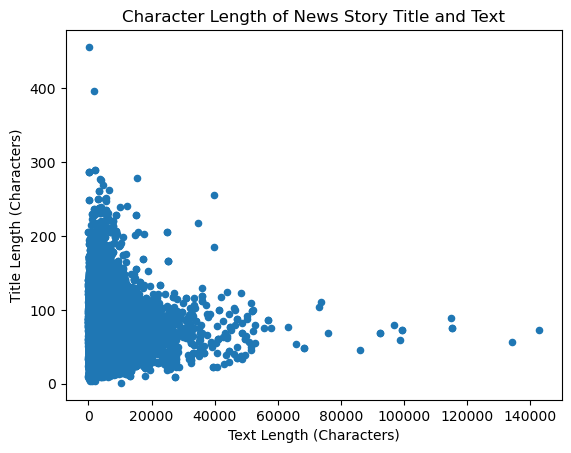

In [18]:
eda.plot.scatter(x='text_length', y='title_length', title = 'Character Length of News Story Title and Text', xlabel = 'Text Length (Characters)', ylabel = 'Title Length (Characters)')

We see that most of the articles that have longer bodies of texts have shorter title length (0-200 characters). On the other hand, most of the articles that have a >200 title length, have shorter bodies of text. These could be the small/trivial news stories that can accurately be cut down into an engaging News Title. Let's see if the title/text lengths change based on whether the news article is real or fake.

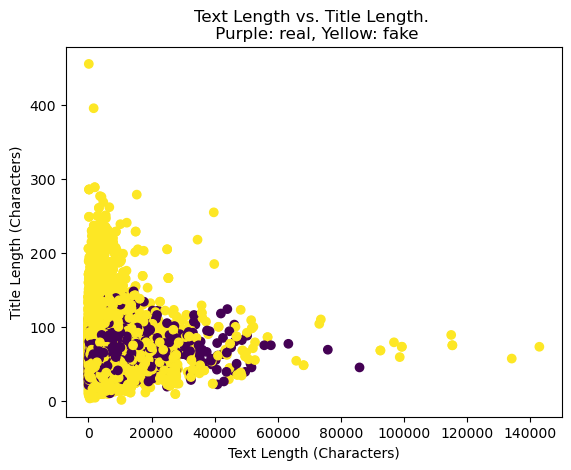

In [20]:
scatter = plt.scatter(
    eda['text_length'],
    eda['title_length'],
    c=eda['label'] 
)

# Labeling the axes and title
plt.xlabel('Text Length (Characters)')
plt.ylabel('Title Length (Characters)')
plt.title('Text Length vs. Title Length. \n Purple: real, Yellow: fake')

plt.show()

Most real news have a short title length and a decent amount of text. We can see that most of the points for real news are located in the bottom left quadrant of the graph. This is a very interesting takeaway, and could be useful for someone just glancing at the length of title/text. If I come across an article with a short title, chances are it is a real news article. And if I come across an article with a long title, chances are it is a fake news article. 

Next, let's look at some **WordClouds** for the fake/real news headings. This could help us get a better sense of what words are frequent in fake news articles vs. real news articles. 

In [22]:
real = df[df.label == 0]
fake = df[df.label == 1]

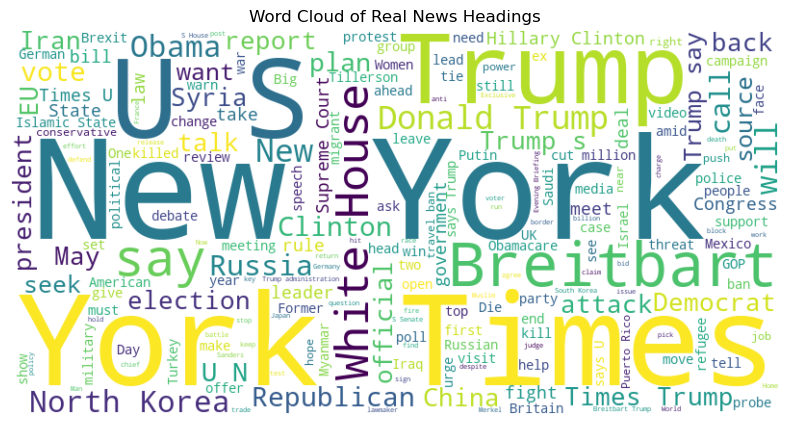

In [23]:
title = ' '.join(real['title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Real News Headings')
plt.show()

We see that the most common words associated with real news headings are New York, Times, Trump, White House, Breitbart, US, Republican, Clinton, report etc. This makes sense as these are probably some of the most commonly used terms in credible news sources.

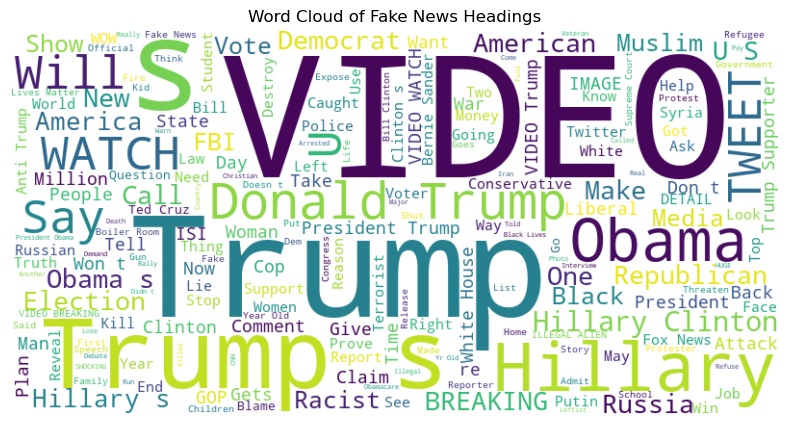

In [24]:
title = ' '.join(fake['title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Fake News Headings')
plt.show()

The most common words in fake news headings seem to be Video, Trump, Obama, Hillary, Tweet, Muslim, etc. This is very interesting as the only word here that doesn't appear in the real articles is 'Video'. Just like how we found a key relationship between title/text length and real/fake news, we find another key factor that could help distinguish real from fake news. Articles with the term 'Video' in the title are most likely going to be fake news, as seen by the wordclouds above.

Next, we can calculate the sentiment polarity for the Text of News Stories, and see if there are any key differences in sentiment between real and fake news. 

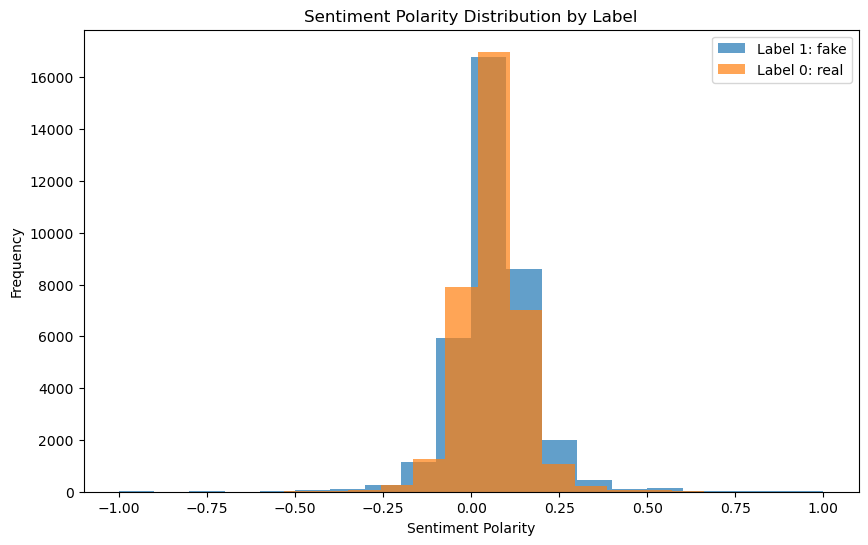

In [25]:
# Calculate sentiment polarity for Text of News Story 
eda['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(10, 6))
plt.hist(eda[eda['label'] == 1]['sentiment'], alpha=0.7, label='Label 1: fake', bins=20)
plt.hist(eda[eda['label'] == 0]['sentiment'], alpha=0.7, label='Label 0: real', bins=20)
plt.title('Sentiment Polarity Distribution by Label')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

There doesn't really seem to be a difference in sentience between real and fake news. However, we can see that when the sentiment polarity is <-0.5, it is most likely going to be classified as fake news. Also, if we were to define 'neutral' as a sentiment between -0.25 and 0.25, it seems as though there are more neutral real articles than fake articles.

Now that we have finished exploring the data and the relationships within it, we can move on to training a model, and testing it on our dataset. 

# Modeling and Results

We plan to use a Naive Bayes Model to classify the label of real/fake news. But, since our data is in text form, we need to find a way to vectorize the text. In other words, we need to find a numeric matrix representation of the news title or text, so we can feed that matrix into the Naive Bayes Model. The NB Model isn't technically supposed to be used on textual data, but if we can manipulate that text data into a set of numbers (0s and 1s), the NB Model can use this to classify the news article.

The way we plan to vectorize the textual data is throught the following: 
1. First, we join all the news titles in the dataset, and all the news texts in the dataset. So, basically we have 2 long sentences - 1 for the news headings, and one for the news text.
2. Second, we tokenize the text, meaning we break down the text into smaller units, typically words or subwords, called tokens.
3. Next, we strip the tokens of all stopwords, like "the", "is", "and", "of", "in", etc. Usually, these will be the most common words since they are necessary to create English sentences. However, they are insignificant 'tokens' to the NB Model because they provide no additional information to whether a news article is real or fake.
4. Then, we remove all numbers and punctuation from the tokens, leaving us with a list of the most 'important' words (tokens) in a news title or text.
5. Finally, we find the most common words by counting the frequency of each distinct token in all the news titles. These most common words will serve as the indexes for our vector
6. We will then go through each title or text in our dataset and if there is a word in the instance that also exists in the top 100-300 words, we will mark that index in the vector as 1.

So, for example, let's say we found the top 5 words in all the news headings to be 'Trump', 'Times', 'House', 'Clinton' and 'Jobs'. 
Now, we find this news heading instance: 'Trump Making Strides in Passing a Bill to Increase Jobs' 
The vector for this news title would be [1,0,0,0,1] since the words 'Trump' and 'Jobs' are in the sentence, but not 'Times', 'House', and 'Clinton'.

Below, we will vectorize all the news titles in our dataset like the above example. We will take the top 100 words and use that to create a matrix representation of all the news titles. Then, we will fit a Naive Bayes model to the training data, and see how the model accuracy is on the test set.

## Title Prediction

In [29]:
nltk.download('stopwords')
nltk.download('punkt')
title = ' '.join(df['title'])
tokens = word_tokenize(title.lower())
stop_words = set(stopwords.words('english'))
tokens1 = [word for word in tokens if word.isalnum() and word not in stop_words]
freqs = Counter(tokens1)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vishal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/vishal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [32]:
topwords = freqs.most_common(100)

# Extract the top 100 words into a list
top_100_words = [word[0] for word in topwords]

In [33]:
word_to_index = {word: i for i, word in enumerate(top_100_words)}

# Initialize a list to collect all rows of new data
all_data = []

# Iterate over each title in the dataframe
for titles in df.title:
    new = [0] * 100
    temp = word_tokenize(titles.lower())
    temp_tokens = [word for word in temp if word.isalnum() and word not in stop_words]
    for word in temp_tokens:
        if word in word_to_index:
            new[word_to_index[word]] = 1
    all_data.append(new)

# Convert list of data into a DataFrame
data = pd.DataFrame(all_data, columns=top_100_words)
data['label'] = df['label']

Here's what the dataframe looks like:

In [35]:
data.head()

,trump,new,video,york,times,says,hillary,obama,clinton,breitbart,...,south,debate,minister,time,fake,senator,military,nuclear,cruz,label
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


Now that we have a matrix representation of the news headings, we can fit a Naive Bayes Model to the training set of this data.

In [37]:
X = data[top_100_words] 
y = data['label']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [39]:
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [40]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 76.41%
Confusion Matrix:
[[5681 3111]
 [1064 7843]]


So these are the results for a Naive Bayes Model that uses News Titles to classify real/fake news, and vectorizes the news titles using the top 100 most frequent words in them. 

This Model has an Accuracy of 76.41%, which is really good, and here is the confusion matrix for our model.

|               | Predicted Negative | Predicted Positive |
|---------------|--------------------|--------------------|
| Actual Negative | 5681               | 3111               |
| Actual Positive | 1064               | 7843               |


Although 76.41% is a great accuracy for a machine learning model, we can try a little harder and tune the hyperparameter of how many frequent words we use to vectorize the text.


### Adjusting Parameters

We already saw the model performance using the top 100 words. Now, we would like to see how the accuracy changes if we increased this number to 150, 200 and 300. This means that our vector representation of the news titles now has a length of 150, 200, or 300, filled with 0s and 1s. 

Here, we put the parameters in a list and loop through each of them, calculating an accuracy and confusion matrix.

In [11]:
accuracy_list = []
confusion_matrices = []

for x in [100, 150, 200, 300]:
    topwords = freqs.most_common(x)
    top_blank_words = [word[0] for word in topwords]
    word_to_index = {word: i for i, word in enumerate(top_blank_words)}
    new_df = []

    # Iterate over each title in the dataframe again to create feature vectors
    for titles in df.title:
        new = [0] * x
        temp = word_tokenize(titles.lower())
        temp_tokens = [word for word in temp if word.isalnum() and word not in stop_words]
        for word in temp_tokens:
            if word in word_to_index:
                new[word_to_index[word]] = 1
        new_df.append(new)

    # Convert the list of data into a DataFrame
    data = pd.DataFrame(new_df, columns=top_blank_words)
    data['label'] = df['label']
    
    X = data[top_blank_words]
    y = data['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    model = MultinomialNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)
    
print(accuracy_list)
for cm in confusion_matrices:
    print(cm)

[0.7641109667212836, 0.7788575625741567, 0.792022148143963, 0.811740776315046]
[[5681 3111]
 [1064 7843]]
[[6025 2767]
 [1147 7760]]
[[6328 2464]
 [1217 7690]]
[[6666 2126]
 [1206 7701]]


## Title Result for Tuning the Matrix Representation (Vectorization) Parameter

### Model Accuracy 

| Model Configuration | Accuracy   |
|---------------------|------------|
| Top 100 Words       | 76.41%     |
| Top 150 Words       | 77.89%     |
| Top 200 Words       | 79.20%     |
| Top 300 Words       | 81.17%     |


### Confusion Matrices

**Top 100 Words**

|                   | Predicted Fake | Predicted Real |
|-------------------|--------------------|--------------------|
| **Actual Fake** | 5681               | 3111               |
| **Actual Real** | 1064               | 7843               |

**Top 150 Words**

|                   | Predicted Fake | Predicted Real |
|-------------------|--------------------|--------------------|
| **Actual Fake** | 6025               | 2767               |
| **Actual Real** | 1147               | 7760               |

**Top 200 Words**

|                   | Predicted Fake | Predicted Real |
|-------------------|--------------------|--------------------|
| **Actual Fake** | 6328               | 2464               |
| **Actual Real** | 1217               | 7690               |

**Top 300 Words**

|                   | Predicted Fake | Predicted Real |
|-------------------|--------------------|--------------------|
| **Actual Fake** | 6666               | 2126               |
| **Actual Real** | 1206               | 7701               |



The best model based off of just accuracy is when we use the top 300 words to vectorize the news titles. We get an accuracy of 81.17%, but our Type II error seems to increase. The model predicted that 1206 news stories were fake when they were actually real, compared to only 1064 false negatives when we used only the top 100 words to vectorize the title. However, since the accuracy difference between top 100 words and top 300 words is around 5%, we believe the best model here is the one that uses the Top 200 words, since it is a good balance between the accuracy, Type I Error, and Type II Error.

Now that we have finished modeling fake/real news based on News Titles, let's see if we can get better accuracy based off the actual bodies of texts within the news articles. We hypothesize that the accuracy should definitely go up since there are more words in the body of the article, allowing the Naive Bayes Model to better classify it as real or fake.

## Text Prediction

Next, we do the same prediction on text to see if it will generate us a better result. Our hypothesis is that the text will give a better accuracy than title prediction as it simply has more content and word counts. 

In [ ]:
text = ' '.join(df['text'])
tokens = word_tokenize(text.lower())
stop_words = set(stopwords.words('english'))
tokens1 = [word for word in tokens if word.isalnum() and word not in stop_words]
freqs = Counter(tokens1)

In [ ]:
# Lists to store results
accuracy_list = []
confusion_matrices = []  

for x in [100, 150, 200, 300]:
    topwords = freqs.most_common(x)
    top_blank_words = [word[0] for word in topwords]
    word_to_index = {word: i for i, word in enumerate(top_blank_words)}
    new_df = []

    # Iterate over each title in the dataframe again to create feature vectors
    for texts in df.text:
        new = [0] * x
        temp = word_tokenize(texts.lower())
        temp_tokens = [word for word in temp if word.isalnum() and word not in stop_words]
        for word in temp_tokens:
            if word in word_to_index:
                new[word_to_index[word]] = 1
        new_df.append(new)

    # Convert the list of data into a DataFrame
    data = pd.DataFrame(new_df, columns=top_blank_words)
    data['label'] = df['label']

    X = data[top_blank_words]
    y = data['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    model = MultinomialNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

    conf_matrix = confusion_matrix(y_test, y_pred)  # Correct function call
    confusion_matrices.append(conf_matrix)
    
print(accuracy_list)
for cm in confusion_matrices:
    print(cm)

## Text Result for Tuning the Matrix Representation (Vectorization) Parameter

### Model Accuracy 

| Model Configuration | Accuracy   |
|---------------------|------------|
| Top 100 Words       | 79.99%     |
| Top 150 Words       | 80.73%     |
| Top 200 Words       | 82.78%     |
| Top 300 Words       | 82.99%     |

### Confusion Matrices

**Top 100 Words**

|                   | Predicted Fake | Predicted Real |
|-------------------|--------------------|--------------------|
| **Actual Fake** | 6782               | 2010               |
| **Actual Real** | 1531               | 7376               |

**Top 150 Words**

|                   | Predicted Fake | Predicted Real |
|-------------------|--------------------|--------------------|
| **Actual Fake** | 6882               | 1910               |
| **Actual Real** | 1500               | 7407               |

**Top 200 Words**

|                   | Predicted Fake | Predicted Real |
|-------------------|--------------------|--------------------|
| **Actual Fake** | 7063               | 1729               |
| **Actual Real** | 1319               | 7588               |

**Top 300 Words**

|                   | Predicted Fake | Predicted Real |
|-------------------|--------------------|--------------------|
| **Actual Fake** | 7190               | 1602               |
| **Actual Real** | 1408               | 7499               |


## Plotting the Results

To better visualize the results and gain more insights into our findings, we will use some simple EDAs to plot the results.

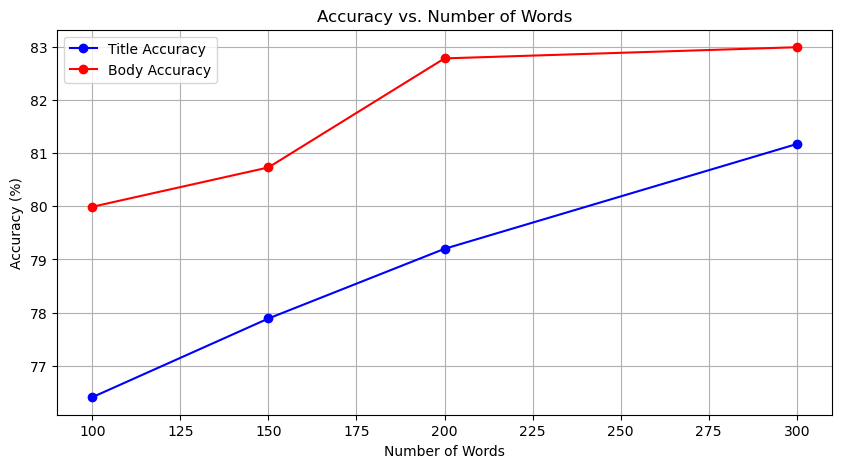

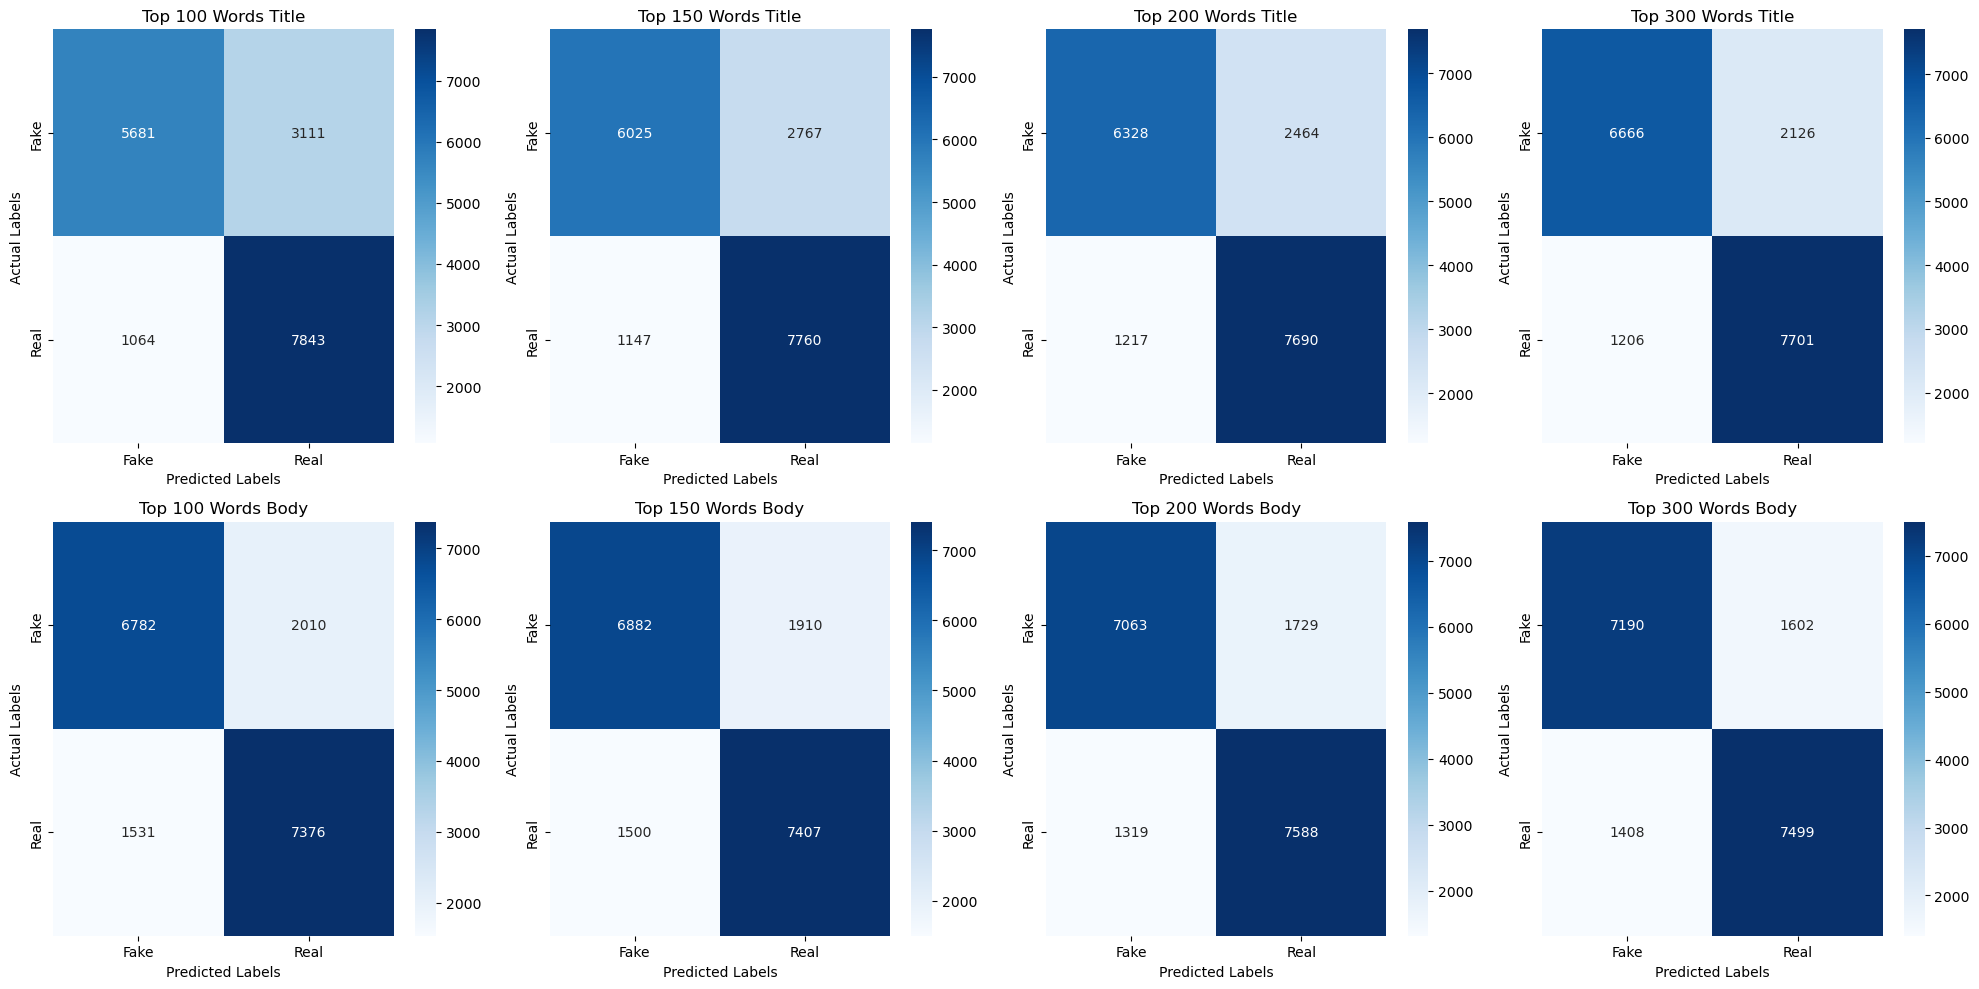

In [6]:
words = [100, 150, 200, 300]
title_accuracies = [76.41, 77.89, 79.20, 81.17]  
body_accuracies = [79.99, 80.73, 82.78, 82.99] 

plt.figure(figsize=(10, 5))
plt.plot(words, title_accuracies, marker='o', linestyle='-', color='b', label='Title Accuracy')
plt.plot(words, body_accuracies, marker='o', linestyle='-', color='r', label='Body Accuracy')
plt.title('Accuracy vs. Number of Words')
plt.xlabel('Number of Words')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()

conf_matrices_title = [
    np.array([[5681, 3111], [1064, 7843]]),
    np.array([[6025, 2767], [1147, 7760]]),
    np.array([[6328, 2464], [1217, 7690]]),
    np.array([[6666, 2126], [1206, 7701]])
]

conf_matrices_body = [
    np.array([[6782, 2010], [1531, 7376]]),
    np.array([[6882, 1910], [1500, 7407]]),
    np.array([[7063, 1729], [1319, 7588]]),
    np.array([[7190, 1602], [1408, 7499]])
]

words = [100, 150, 200, 300]  

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for i, ax in enumerate(axes.flat):
    if i < 4:  
        conf_matrix = conf_matrices_title[i % 4]
    else: 
        conf_matrix = conf_matrices_body[i % 4]

    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Top {words[i % 4]} Words {"Title" if i < 4 else "Body"}')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('Actual Labels')
    ax.set_xticklabels(['Fake', 'Real'])
    ax.set_yticklabels(['Fake', 'Real'])

plt.tight_layout()
plt.show()

The first graph illustrates the relationship between the number of words used in our models and their corresponding accuracy rates for both news titles and the body text. As we **increase the number of top frequent words** from 100 to 300 for vectorization, there is a clear **trend of improved accuracy**. This suggests that a richer linguistic dataset provides our models with more detailed features, enhancing their ability to correctly classify news as either real or fake. The disparity in performance between title-based and body-based models highlights the additional context and detail available in full articles, which aids in more accurate classification.

The second graph is a set of heatmaps displayed here represent confusion matrices for both title-based and body-based news classification models across different word count thresholds. Each matrix provides a breakdown of true positives, true negatives, false positives, and false negatives. For instance, with 100 words, the title-based model correctly identified 7,843 real news articles and 5,681 fake news articles but also incorrectly labeled 3,111 real articles as fake and 1,064 fake articles as real. As we expanded the word count to 300, the number of both false positives and false negatives decreased, showcasing enhanced model sensitivity and specificity.



# Conclusion and Discussion

In this project, we explored the use of machine learning techniques to differentiate between fake and real news articles using both titles and the body text. The models were tested with varying numbers of top frequent words to determine the optimal configuration for accurate news classification. Below, we summarize our findings, discuss potential implications, and suggest directions for future research.


1. **Enhanced Accuracy with More Data**: Increasing the number of words used for vectorization significantly improved the accuracy of our models. The model using the top 300 words in article bodies achieved the highest accuracy, underscoring the importance of a rich feature set for effective classification.
2. **Superior Performance from Full Text Analysis**: The models trained on the full text of articles consistently outperformed those trained on titles alone. This highlights the value of contextual and detailed content in distinguishing between real and fake news.
3. **Trade-offs in Error Rates**: While the models generally showed a decrease in false negatives with more extensive vocabularies, the impact on false positives was less consistent. This variability indicates a need for more nuanced feature engineering or alternative modeling techniques that can better balance these errors.



It's worth noting that limitations exist for our study. Our models rely predominantly on text analysis, which may not capture non-textual elements that contribute to misinformation, such as manipulated images or deepfake videos.
Moreover, language use evolves rapidly, especially in media contexts; thus, models trained on current datasets may become outdated as new forms of expression and slang emerge.

For future studies, there are a few things to focus on:
- **Incorporating Multimodal Data**: To capture a broader range of misinformation features, future research could incorporate multimodal approaches that analyze images and videos alongside text.
- **Real-time Detection Systems**: Developing real-time detection models that can operate directly on social media platforms to flag fake news as it is posted would significantly reduce the spread of misinformation.
- **Advanced Language Models**: Utilizing state-of-the-art language processing models, such as transformers and contextual embeddings, could potentially improve both the accuracy and the robustness of fake news detection systems.
